# Exercise 3 - MLP (Multi-Layer Perceptron)
*Author: Leonardo Teixeira*

In [12]:
import numpy as np
import pandas as pd

## 1) Manual Calculation of MLP Steps

In [3]:
x = np.array([0.5, -0.2])
y_true = 1

W1 = np.array([[0.3, -0.1], 
               [0.2, 0.4]])
b1 = [0.1, -0.2]

W2 = np.array([0.5, -0.3])
b2 = 0.2

learning_rate = 0.3

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

In [4]:
# Forward Pass
# 1. Compute the hidden layers pre-activation
# Produto linear
z1 = np.dot(W1, x) + b1

# 2. Hidden layer activation
a = tanh(z1)

# 3. Output layer pre-activation
z2 = np.dot(W2, a) + b2

# 4. Final Output
y_pred = tanh(z2)

print("z1 (hidden layers pre-activation):", z1)
print("a (hidden layer activation):", a)
print("z2 (output layer pre-activation):", z2)
print("y_pred (final output):", y_pred)


z1 (hidden layers pre-activation): [ 0.27 -0.18]
a (hidden layer activation): [ 0.26362484 -0.17808087]
z2 (output layer pre-activation): 0.38523667817130075
y_pred (final output): 0.36724656264510797


In [7]:
# Loss Calculation
# Funcao de perda (MSE com 1 exemplo)

N = 1

L = (1 / N) * (y_true - y_pred) ** 2

print("L (loss):", L)

L (loss): 0.4003769124844312


In [10]:
# Backward Pass (Backpropagation)
# 1. dL/dy_pred
dL_dy = 2 * (y_pred - y_true)

# 2. dL/dz2
dL_dz2 = dL_dy * tanh_derivative(z2)

# 3. Gradients for output layer
dL_dW2 = dL_dz2 * a
dL_db2 = dL_dz2

# 4. Hidden layer propagations
dL_da = W2 * dL_dz2
dL_dz1 = dL_da * tanh_derivative(z1)

# 5. Hidden layer gradients
dL_dW1 = np.outer(dL_dz1, x)
dL_db1 = dL_dz1

print("Output gradient - dL/dW2:", dL_dW2)
print("Output gradient - dL/db2:", dL_db2)
print("Hidden gradient - dL/dW1:\n", dL_dW1)
print("Hidden gradient - dL/db1:", dL_db1)

Output gradient - dL/dW2: [-0.28862383  0.19496791]
Output gradient - dL/db2: -1.0948279147135995
Hidden gradient - dL/dW1:
 [[-0.25468488  0.10187395]
 [ 0.15901618 -0.06360647]]
Hidden gradient - dL/db1: [-0.50936975  0.31803236]


In [11]:
# Output layer
W2_new = W2 - learning_rate * dL_dW2
b2_new = b2 - learning_rate * dL_db2

# Hidden layer
W1_new = W1 - learning_rate * dL_dW1
b1_new = b1 - learning_rate * dL_db1

print("New W2:", W2_new)
print("New b2:", b2_new)
print("New W1:\n", W1_new)
print("New b1:", b1_new)

New W2: [ 0.58658715 -0.35849037]
New b2: 0.5284483744140799
New W1:
 [[ 0.37640546 -0.13056219]
 [ 0.15229515  0.41908194]]
New b1: [ 0.25281093 -0.29540971]


In [14]:
data = {
    "Param": ["W2[0]", "W2[1]", "b2", 
                  "W1[0,0]", "W1[0,1]", "W1[1,0]", "W1[1,1]", 
                  "b1[0]", "b1[1]"],
    
    "Inicial": [W2[0], W2[1], b2, 
                W1[0,0], W1[0,1], W1[1,0], W1[1,1], 
                b1[0], b1[1]],
    
    "Updated": [W2_new[0], W2_new[1], b2_new, 
                   W1_new[0,0], W1_new[0,1], W1_new[1,0], W1_new[1,1], 
                   b1_new[0], b1_new[1]]
}

# Create DataFrame
df = pd.DataFrame(data)

df

,Param,Inicial,Updated
0,W2[0],0.5,0.586587
1,W2[1],-0.3,-0.358490
2,b2,0.2,0.528448
3,"W1[0,0]",0.3,0.376405
4,"W1[0,1]",-0.1,-0.130562
5,"W1[1,0]",0.2,0.152295
6,"W1[1,1]",0.4,0.419082
7,b1[0],0.1,0.252811
8,b1[1],-0.2,-0.295410


## 2) Binary Classification with Synthetic Data and Scratch MLP

In [16]:
# 1. Generate and split the data into training (80%) and testing (20%) sets.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Update N for this section
N = 1000

# Generate class 0 with 1 cluster
X0, y0 = make_classification(n_samples=500, n_features=2, 
                             n_informative=2, n_redundant=0, 
                             n_clusters_per_class=1, n_classes=2, 
                             weights=[1.0, 0.0], # força tudo em uma classe
                             class_sep=1.5, random_state=42)

# Generate class 1 with 2 clusters
X1, y1 = make_classification(n_samples=500, n_features=2, 
                             n_informative=2, n_redundant=0, 
                             n_clusters_per_class=2, n_classes=2, 
                             weights=[0.0, 1.0], # força tudo na outra classe
                             class_sep=1.5, random_state=24)

# Combine the datasets
X = np.vstack((X0, X1))
y = np.concatenate((y0, y1))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Feature dimensions: {X_train.shape[1]}")


Training set size: 800
Testing set size: 200
Feature dimensions: 2


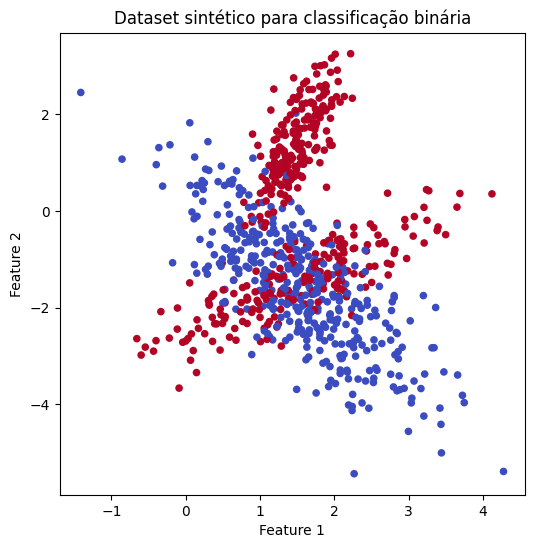

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20)
plt.title("Dataset sintético para classificação binária")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [61]:
import numpy as np

# Architecture
input_size = 2
hidden_size = 4
output_size = 1

# Weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(hidden_size, input_size) / np.sqrt(input_size)
b1 = np.zeros((hidden_size, 1))

W2 = np.random.randn(output_size, hidden_size) / np.sqrt(hidden_size)
b2 = np.zeros((output_size, 1))

print("Dimensions:")
print(f"W1: {W1.shape}, b1: {b1.shape}")
print(f"W2: {W2.shape}, b2: {b2.shape}")

Dimensions:
W1: (4, 2), b1: (4, 1)
W2: (1, 4), b2: (1, 1)


In [62]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

# Forward pass
def forward_pass(X, W1, b1, W2, b2):
    # Hidden layer
    z1 = np.dot(W1, X.T) + b1  # Shape: (hidden_size, N)
    a1 = tanh(z1)              # Shape: (hidden_size, N)
    
    # Output layer
    z2 = np.dot(W2, a1) + b2   # Shape: (output_size, N)
    a2 = sigmoid(z2)           # Shape: (output_size, N)
    
    return z1, a1, z2, a2

In [63]:
# X_train vem do dataset que já dividimos
Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)

print("Neural Network Output for the first 10 examples:")
print(A2.flatten()[:10])


Neural Network Output for the first 10 examples:
[0.43038448 0.4928931  0.39245943 0.39138581 0.39119215 0.48485004
 0.34393026 0.43490979 0.38371192 0.52421808]


In [64]:
def binary_cross_entropy(y_true, y_pred):
    # To avoid log(0), we clip the predictions
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    y_pred = y_pred.flatten()  # Garantir shape (N,)
    m = y_true.shape[0]
    loss = - (1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [65]:
loss = binary_cross_entropy(y_train, A2)

print(f"Training loss: {loss}")


Training loss: 0.6443503641534776


In [66]:
def backward_pass(X, y_true, Z1, A1, Z2, A2, W2):
    m = X.shape[0]
    
    # Output layer
    dZ2 = A2 - y_true.reshape(1, -1)          # shape (1, m)
    dW2 = (1/m) * np.dot(dZ2, A1.T)           # shape (1, hidden_size)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # shape (1,1)
    
    # Hidden layer
    dA1 = np.dot(W2.T, dZ2)                   # shape (hidden_size, m)
    dZ1 = dA1 * tanh_derivative(A1)           # tanh derivative applied to A1
    dW1 = (1/m) * np.dot(dZ1, X)              # shape (hidden_size, input_size)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

In [67]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [68]:
epochs = 500
learning_rate = 0.1
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1, A1, Z2, A2 = forward_pass(X_train, W1, b1, W2, b2)
    
    # Loss
    loss = binary_cross_entropy(y_train, A2)
    losses.append(loss)
    
    # Backward pass
    dW1, db1, dW2, db2 = backward_pass(X_train, y_train, Z1, A1, Z2, A2, W2)
    
    # Update parameters
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 0.6443503641534776
Epoch 10, Loss: 0.6179961623054703
Epoch 20, Loss: 0.6009435411880102
Epoch 30, Loss: 0.5896827506695688
Epoch 40, Loss: 0.582169755236895
Epoch 50, Loss: 0.5770648955839456
Epoch 60, Loss: 0.5734788573988905
Epoch 70, Loss: 0.5708359735204528
Epoch 80, Loss: 0.5687725741037378
Epoch 90, Loss: 0.5670625353564961
Epoch 100, Loss: 0.5655665772589119
Epoch 110, Loss: 0.5641994378587536
Epoch 120, Loss: 0.5629092011500454
Epoch 130, Loss: 0.5616644519947154
Epoch 140, Loss: 0.5604463383061377
Epoch 150, Loss: 0.559243672061312
Epoch 160, Loss: 0.5580499035064846
Epoch 170, Loss: 0.556861250252348
Epoch 180, Loss: 0.5556755410624841
Epoch 190, Loss: 0.5544915048342572
Epoch 200, Loss: 0.5533083391770839
Epoch 210, Loss: 0.552125455902641
Epoch 220, Loss: 0.5509423387825552
Epoch 230, Loss: 0.5497584720763554
Epoch 240, Loss: 0.5485733126688537
Epoch 250, Loss: 0.5473862878119009
Epoch 260, Loss: 0.5461968065446111
Epoch 270, Loss: 0.5450042770501294
Epoch 2

In [69]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return (A2 >= 0.5).astype(int) # threshold 0.5

def accuracy(X, y, W1, b1, W2, b2):
    y_pred = predict(X, W1, b1, W2, b2)
    return np.mean(y_pred.flatten() == y.flatten())

train_acc = accuracy(X_train, y_train, W1, b1, W2, b2)
test_acc = accuracy(X_test, y_test, W1, b1, W2, b2)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy: {test_acc:.4f}")

Training accuracy: 0.7300
Testing accuracy: 0.6800


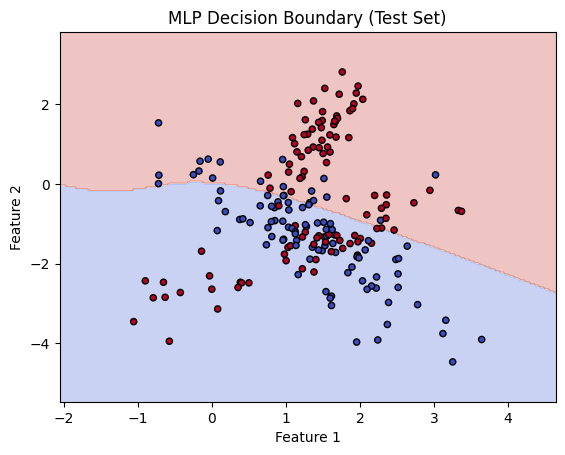

In [ ]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, W1, b1, W2, b2, title="Decision Boundary"):
    # Limites do gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Grid de pontos
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predições na malha
    preds = predict(grid, W1, b1, W2, b2)
    preds = preds.reshape(xx.shape)
    
    # Plot das regiões
    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot dos pontos reais
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
    
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Usar no treino ou teste
plot_decision_boundary(X_test, y_test, W1, b1, W2, b2, title="MLP Decision Boundary (Test Set)")

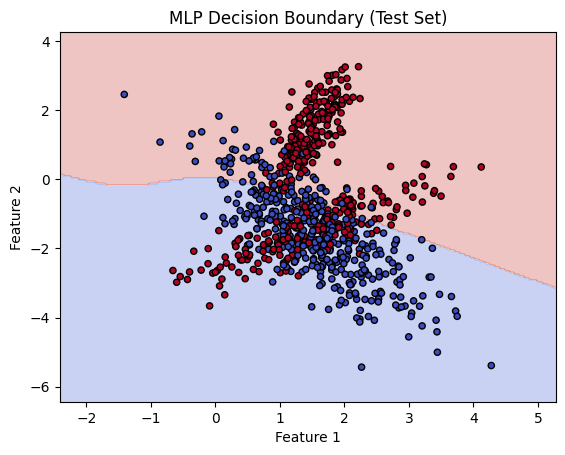

In [71]:
# Plot train decision boundary
plot_decision_boundary(X_train, y_train, W1, b1, W2, b2, title="MLP Decision Boundary (Test Set)")
